# Working with Imbalanced Data

- When target column in a dataset has significantly lower proportions of one class compared to other, then we are dealing with imbalanced classification:
    - **Majority class** : the class with higher ratio
    - **Minority class** : the class with lower ratio
- Issues with Imbalanced Data:
    - Difficulty in predicting the minority class 
    - Accuracy can be misleading on imbalanced data (bad job with minority class and good job with majority class)
    You may have high accuracy number but its mainly focused on correctly predicting the majority

- Addressing the imbalanced data:
    - Gather more data to balance the proportions is the best approach
    - Synthetically improving the data: adjusting the data distribution to balance: 
        - **Oversampling** the minority class --> increase size of the minority class
        - **Downsampling** the majority class --> decrease size of the majority class
- One of the most popular techniques for oversampling is called **SMOTE** (Synthetic Minority Oversampling Technique)

## SMOTE 
![smote](https://miro.medium.com/v2/resize:fit:850/1*QaNfJwU6P-VnG1zp3U4cVg.png)

- Advantages of SMOTE:
    - Balancing the proportions between minority and majority classes
    - Fast performance and effectiveness

- Disadvantages of SMOTE:
    - May cause Overfitting 
    - It is hard to ensure that synthetic data properly represents the original data 

- Ratio consideration for using SMOTE for Majority and Minority classes
    - 70:30 (maybe use if gives bad performance at the end)
    - 85:15 (recommended to use)

> Its highly recommended to remove outliers before doing SMOTE, otherwise outliers can also get mimicked

In [24]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [25]:
df = pd.read_csv('/home/vinayakgaur07/Downloads/pima-indian_diabetes.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


> it has no column headers so it made, the 1st row as header, so we used **header=None** but we need to add column header names:

In [26]:
df.columns = ['Pregnancies','PlasmaGlucose','DiastolicBP','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Diabetic']
df.head()

,Pregnancies,PlasmaGlucose,DiastolicBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [27]:
df['Diabetic'].value_counts(normalize=True)

Diabetic
1    0.65
0    0.35
Name: proportion, dtype: float64

>plot it

<Axes: xlabel='Diabetic'>

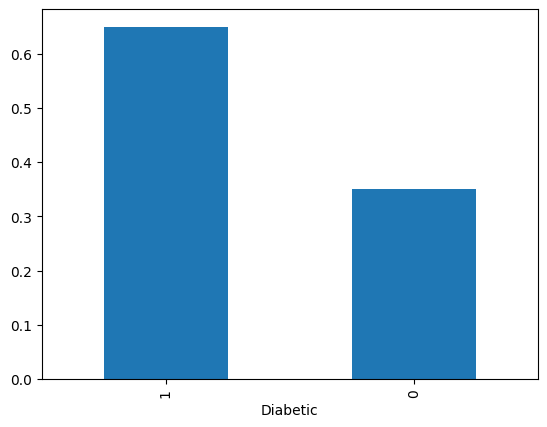

In [28]:
df['Diabetic'].value_counts(normalize=True).plot(kind='bar')


check for nulls: 

In [29]:
df.isna().sum()

Pregnancies                 0
PlasmaGlucose               0
DiastolicBP                 0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Diabetic                    0
dtype: int64

In [30]:
df.duplicated().sum()

0

In [31]:
df.describe()

,Pregnancies,PlasmaGlucose,DiastolicBP,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetic
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000
mean,4.50000,129.400000,61.700000,17.800000,116.150000,30.950000,0.511650,37.450000,0.65000
std,3.56149,35.354446,26.159631,17.733703,215.843821,9.654424,0.513691,11.591626,0.48936
min,0.00000,78.000000,0.000000,0.000000,0.000000,0.000000,0.134000,21.000000,0.00000
25%,1.00000,106.000000,57.500000,0.000000,0.000000,26.975000,0.198500,30.750000,0.00000
50%,4.50000,117.000000,70.000000,21.000000,0.000000,30.300000,0.374500,32.000000,1.00000
75%,7.25000,152.500000,74.000000,32.750000,114.000000,35.875000,0.560000,50.250000,1.00000
max,10.00000,197.000000,96.000000,47.000000,846.000000,45.800000,2.288000,59.000000,1.00000


> Consider cleaning some columns where it doesn't make sense as it represents missing data (eg: 0 BMI cannot exist)

<Axes: xlabel='Diabetic', ylabel='Age'>

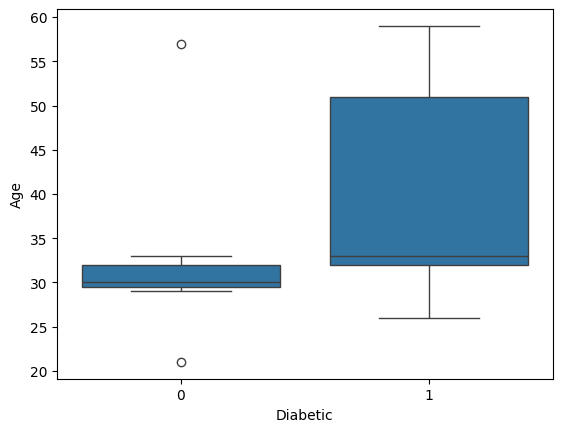

In [32]:
sns.boxplot(data=df, x='Diabetic', y='Age')

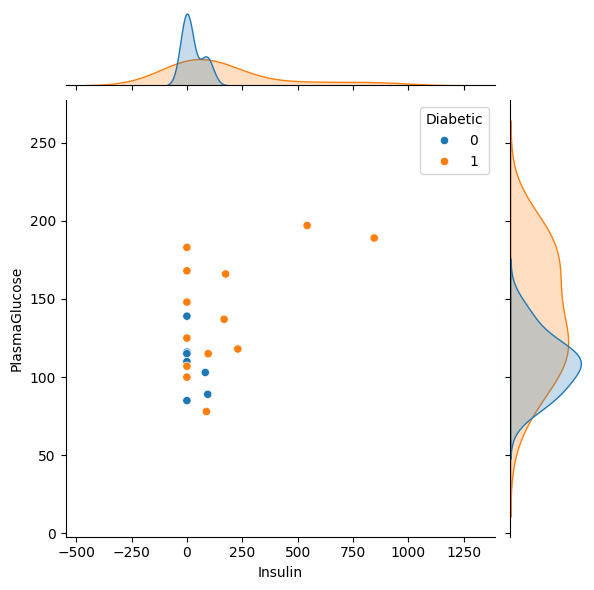

In [33]:
sns.jointplot(data=df, x='Insulin', y='PlasmaGlucose', hue='Diabetic')

In [34]:
df.columns

Index(['Pregnancies', 'PlasmaGlucose', 'DiastolicBP', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Diabetic'],
      dtype='object')

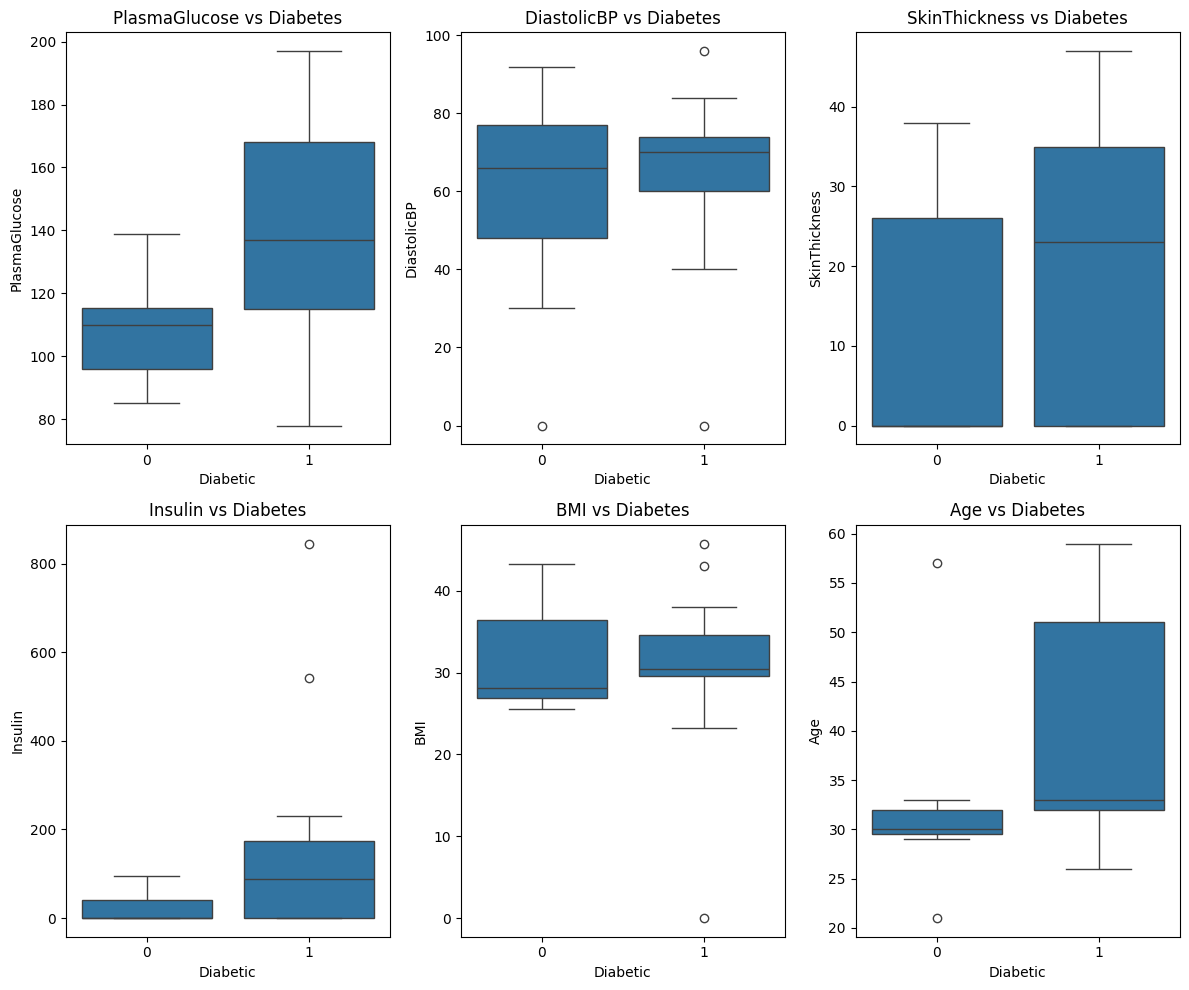

In [35]:
features = ['PlasmaGlucose', 'DiastolicBP', 'SkinThickness', 'Insulin', 'BMI', 'Age']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12,10))
axes = axes.flatten()

for i,col in enumerate(features):
        sns.boxplot(data = df, x='Diabetic', y=col, ax=axes[i])
        axes[i].set_title(f'{col} vs Diabetes')

plt.tight_layout()

Now split the data 

In [36]:
X = df.drop(columns='Diabetic', axis=1)
y = df['Diabetic']

`pip install imblearn`

In [37]:
from imblearn.over_sampling import SMOTE

Usage with hyperparameters:
- Default: 
    - `sampling_strategy = 'auto'` --> balances the minority class to match the majority(1:1 ratio)
    - `k_neighbors=5` --> no.of nearest similar points in the minority class

- Controlling the upsampling:
    - eg: `sampling_strategy = 0.5` --> the minority class will have 50% the number of samples as the majority class after resampling

![knn](https://www.jcchouinard.com/wp-content/uploads/2021/08/image-8.png)

> here in the diagram the star is our new data point being created by SMOTE and it looks at other nearest located minoirty class to craete that synthetic data 
How many neighbours it looks at is controlled by `k_neighbors`

In [38]:
smote_model = SMOTE(random_state=10)

In [39]:
X_resampled, y_resampled = smote_model.fit_resample(X, y) 

In [40]:
# before and after comparision
X.shape, X_resampled.shape

((20, 8), (26, 8))

> As we can see SMOTE increased the dataset by 6

In [41]:
y_resampled.value_counts()

Diabetic
1    13
0    13
Name: count, dtype: int64

<Axes: xlabel='Diabetic'>

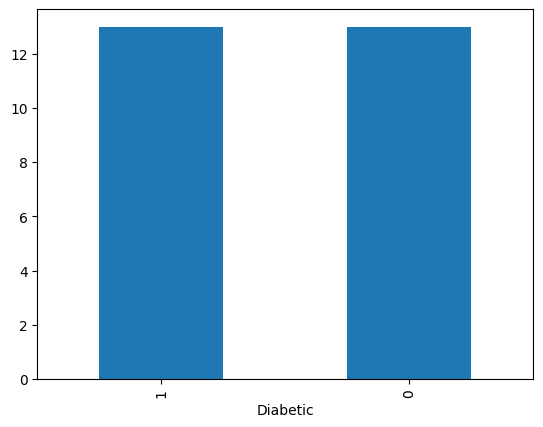

In [42]:
y_resampled.value_counts().plot(kind='bar')

> Now the data is Balanced !!

Now we use our improved data to predict Diabetes

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=20)

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [46]:
knn_model = KNeighborsClassifier(n_neighbors=4)  #n neighbors is a hyperparameter

#train the model
knn_model.fit(X_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",4
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'auto'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",None


In [47]:
y_pred = knn_model.predict(X_test)

In [49]:
print(f'Model Accuracy:{accuracy_score(y_test, y_pred):.2f}')
print(f'Model F1 Score:{f1_score(y_test, y_pred):.2f}')

Model Accuracy:0.83
Model F1 Score:0.67


> You can perform hyperparameter tuning with SMOTE

In [52]:
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [54]:
#define your pipeline 
pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('knn', KNeighborsClassifier())
])

In [57]:
df['Diabetic'].value_counts()[1]/df['Diabetic'].value_counts()[0]

1.8571428571428572

In [58]:
#define hyperparameter grid
param_grid ={
    'smote__k_neighbors':[3,5,7],
    'smote__sampling_strategy':[0.55, 0.75, 1.0, 1.86, 2.0],
    'knn__n_neighbors':[3,4,5,7],
    'knn__weights':['uniform', 'distance'],
    'knn__p':[1,2]
}

In [68]:
gs_knn_model = GridSearchCV(pipeline, param_grid, scoring='f1', cv=5)

In [69]:
gs_knn_model.fit(X,y)

/home/vinayakgaur07/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
912 fits failed out of a total of 1200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/home/vinayakgaur07/.local/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/vinayakgaur07/.local/lib/python3.12/site-packages/sklearn/base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/vinayakgaur07/.local/lib/python3.12/site-packages/imblearn/pip

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",Pipeline(step...lassifier())])
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'knn__n_neighbors': [3, 4, ...], 'knn__p': [1, 2], 'knn__weights': ['uniform', 'distance'], 'smote__k_neighbors': [3, 5, ...], ...}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'f1'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold an

In [70]:
gs_knn_model.best_params_

{'knn__n_neighbors': 5,
 'knn__p': 2,
 'knn__weights': 'distance',
 'smote__k_neighbors': 3,
 'smote__sampling_strategy': 0.75}

In [71]:
gs_knn_model.best_score_

0.7314285714285714

## Under Sampling 

In [72]:
from imblearn.under_sampling import RandomUnderSampler

In [73]:
und_samp = RandomUnderSampler(random_state=10)
X_und_samp, y_und_samp = und_samp.fit_resample(X,y)

<Axes: xlabel='Diabetic'>

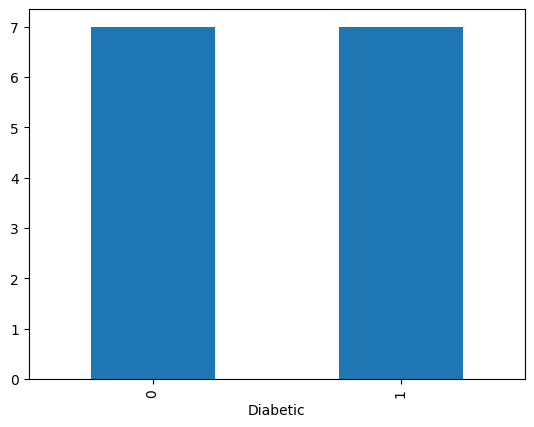

In [74]:
y_und_samp.value_counts().plot(kind='bar')

> here we removed data from majority class to match minority class 
That's why we consider Oversampling over Undersampling first, cuz we don't want to lose data , we rather add data than lose data 

Remaining procedure is same as for Oversampling